# Modelos de Regresión Lineal
## Modelocreado con datos simulados
* **La variable dependiente estará definida por:** y = a + b * x
* **Los valores simulados tendrán una distribuvión normal con media = 1.5 y desviación estándar de 2.5**
* **La Y estimada estará dada por Ye= 2 + 0.3 *x + e**
* **el error tendrán una distribuvión normal con media = 0 y desviación estándar de 0.8**

In [14]:
import pandas as pd
import numpy as np

In [15]:
x = 1.5 + 2.5 * np.random.randn(100)

In [16]:
res = 0 + 0.8 * np.random.randn(100)

In [17]:
y_pred = 2 + 0.3 * x

In [18]:
y_act = 2 + 0.3 * x + res

In [19]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [20]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [21]:
data.head()

,x,y_actual,y_prediccion
0,2.819472,2.140835,2.845842
1,0.463237,2.402434,2.138971
2,-0.898327,1.461761,1.730502
3,-1.938934,1.575765,1.418320
4,3.943390,2.589570,3.183017


In [22]:
import matplotlib.pyplot as plt

In [23]:
#Para pintar la recta que representa el valor promedio
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

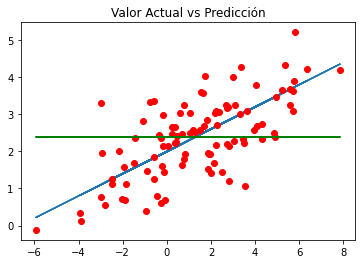

In [24]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [25]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.3657262003226465, 2.382154491088555)

In [26]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [27]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [28]:
alpha = y_mean - beta * x_mean

In [29]:
alpha, beta

(2.011111413210819, 0.27168189186828123)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [30]:
data["y_model"] = alpha + beta * data["x"]

In [31]:
data.head()

,x,y_actual,y_prediccion,beta_n,beta_d,y_model
0,2.819472,2.140835,2.845842,-0.350818,2.113377,2.777111
1,0.463237,2.402434,2.138971,-0.018302,0.814486,2.136965
2,-0.898327,1.461761,1.730502,2.083820,5.125935,1.767052
3,-1.938934,1.575765,1.418320,2.664844,10.920777,1.484338
4,3.943390,2.589570,3.183017,0.534648,6.644350,3.082459


In [32]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [33]:
SSR, SSD, SST

(51.10068928596294, 59.346605628756386, 110.44729491471938)

In [34]:
R2 = SSR / SST
R2

0.462670356258338

Text(0.5, 1.0, 'Valor Actual vs Predicción')

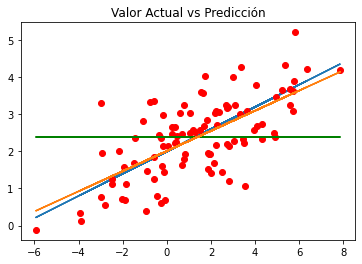

In [35]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [36]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7781886715037027

In [37]:
np.mean(data["y_actual"])

2.382154491088555

In [38]:
RSE / np.mean(data["y_actual"])

0.3266743086625334